In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.exceptions import NotFittedError

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

sns.set_style('darkgrid')

%matplotlib inline

In [76]:
col_drop_list=[]

In [77]:
df=pd.read_csv('nces330_20.csv')
df.head()

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473


In [78]:
target = 'Value'
target

'Value'

In [79]:
df.describe()

,Year,Value
count,3548.000000,3548.000000
mean,2016.923337,13027.720124
std,2.553910,8734.568645
min,2013.000000,1225.000000
25%,2015.000000,7756.750000
50%,2017.000000,10203.500000
75%,2019.000000,14830.750000
max,2021.000000,49152.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3548 non-null   int64 
 1   State    3548 non-null   object
 2   Type     3548 non-null   object
 3   Length   3548 non-null   object
 4   Expense  3548 non-null   object
 5   Value    3548 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.4+ KB


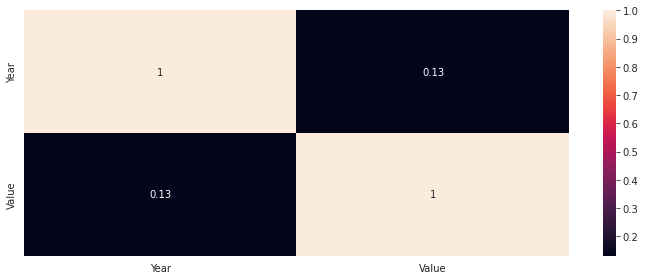

In [81]:
height=10
width = 4
plt.figure(figsize=(height,width))
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

In [82]:
cat_col_large=[]
for col in df.select_dtypes(include='object'):
    if(col!=target and df[col].nunique()>20):
        print(f"{col:20} ----> {df[col].nunique():10} unique values")
        cat_col_large.append(col)
cat_col_large

State                ---->         51 unique values


['State']

In [83]:
cat_col=[]
for col in df.select_dtypes(include='object'):
    if(col!=target and col not in cat_col_large):
        print(f"{col:20} ----> {df[col].nunique():10} unique values")
        cat_col.append(col)
cat_col

Type                 ---->          3 unique values
Length               ---->          2 unique values
Expense              ---->          2 unique values


['Type', 'Length', 'Expense']

In [84]:
num_col=[]
for col in df.columns:
    if(col!=target and col not in (cat_col+cat_col_large)):
        print(f"{col:30} ----> {df[col].nunique():10} unique values")
        num_col.append(col)
num_col

Year                           ---->          9 unique values


['Year']

In [85]:
len(cat_col),len(cat_col_large),len(num_col)

(3, 1, 1)

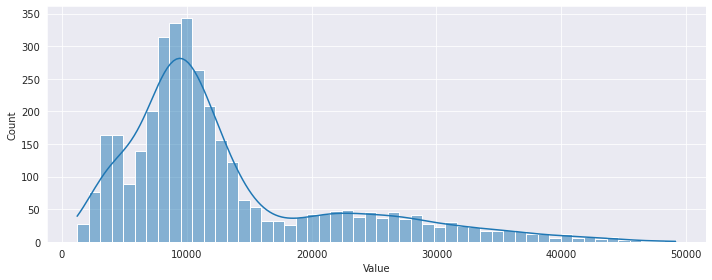

In [86]:
plt.figure(figsize=(height,width))
sns.histplot(data=df,x=target,kde=True,palette='tab10')
plt.tight_layout()

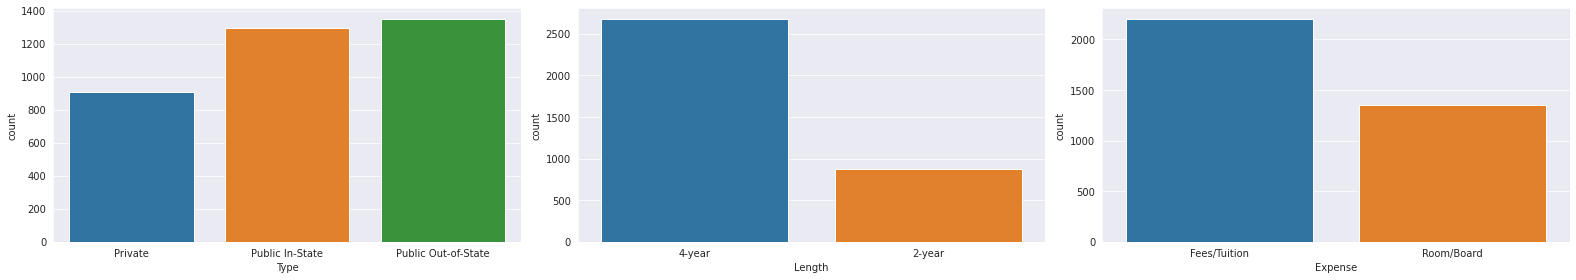

In [87]:
plt.figure(figsize=(height + 12,width))
j=1
for columns in cat_col:
    plt.subplot(1,3,j) #plt.subplot(nrows, ncols, index)
    sns.countplot(x=columns,data=df)
    j+=1
plt.tight_layout()

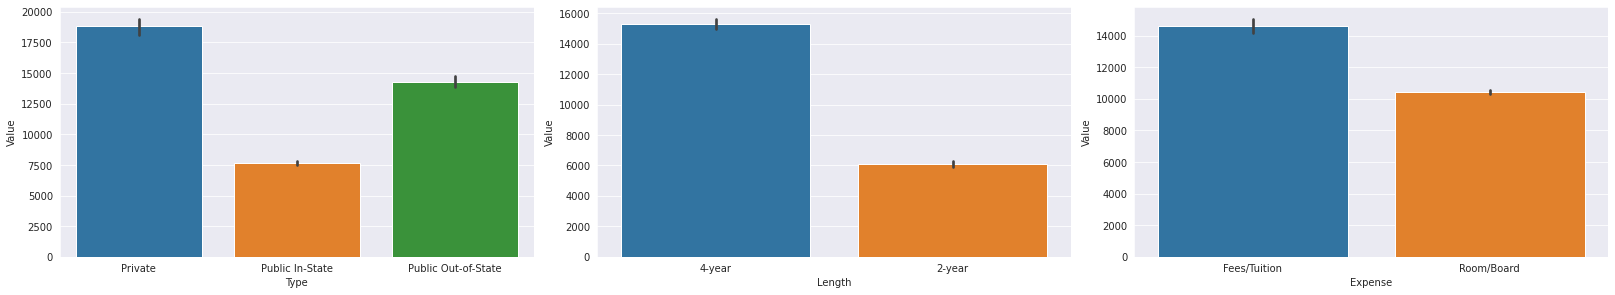

In [88]:
plt.figure(figsize=(30,20))
j=1
for columns in cat_col:
    plt.subplot(5,4,j) #plt.subplot(nrows, ncols, index)
    sns.barplot(y=target,x=columns,data=df)
    j+=1
plt.tight_layout()

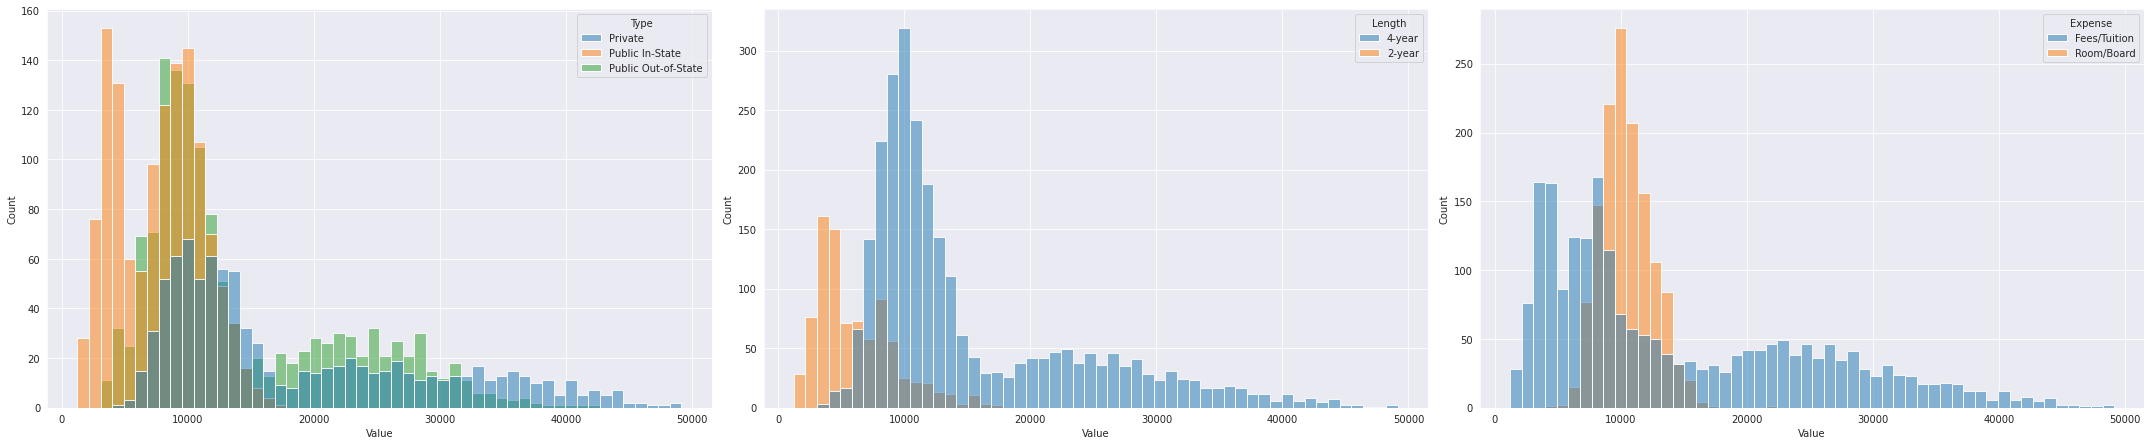

In [89]:
plt.figure(figsize=(30,12))
j=1
for columns in cat_col:
    plt.subplot(2,3,j)
    sns.histplot(x=target,data=df,hue=columns)
    j+=1
plt.tight_layout()

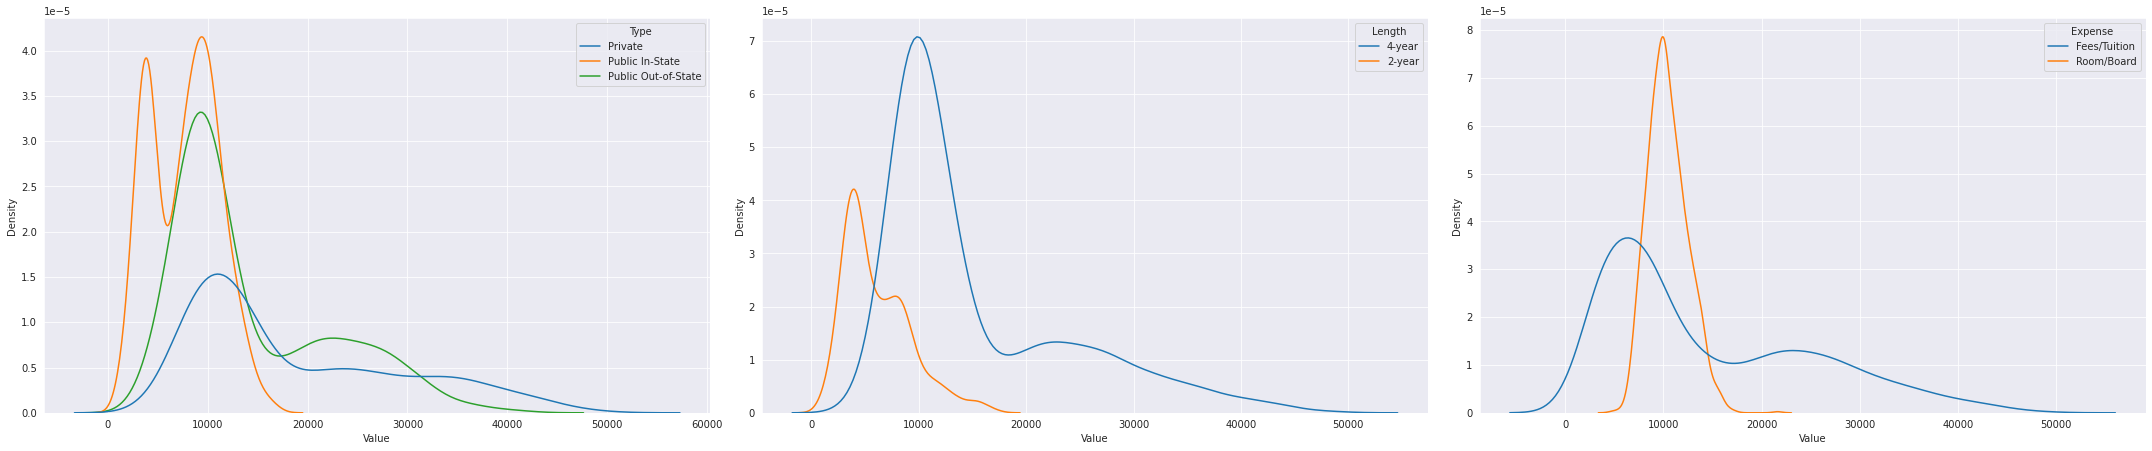

In [90]:
plt.figure(figsize=(30,12))
j=1
for columns in cat_col:
    plt.subplot(2,3,j)
    sns.kdeplot(x=target,data=df,hue=columns)
    j+=1
plt.tight_layout()

In [91]:
oh=OneHotEncoder(drop='first',handle_unknown='ignore')

ms,ss=MinMaxScaler(),StandardScaler()


ct=ColumnTransformer(  #constructor 
    [
        ('cat_encoder',oh,make_column_selector(dtype_include='object'))
    ],
    remainder='passthrough',
    n_jobs=-1
)
ct

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('cat_encoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe032ee10d0>)])

In [92]:
X=df.drop([target],axis=1)
y=df[[target]]
X.head(5)

,Year,State,Type,Length,Expense
0,2013,Alabama,Private,4-year,Fees/Tuition
1,2013,Alabama,Private,4-year,Room/Board
2,2013,Alabama,Public In-State,2-year,Fees/Tuition
3,2013,Alabama,Public In-State,4-year,Fees/Tuition
4,2013,Alabama,Public In-State,4-year,Room/Board


In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)

In [94]:
X_train.shape

(2838, 5)

In [95]:
y_train.shape

(2838, 1)

In [96]:
X_test.shape,y_test.shape

((710, 5), (710, 1))

In [97]:
X_test.head()

,Year,State,Type,Length,Expense
1281,2016,Florida,Public In-State,4-year,Room/Board
2480,2019,Florida,Public Out-of-State,2-year,Fees/Tuition
657,2014,New York,Public In-State,2-year,Fees/Tuition
3311,2021,Kansas,Public Out-of-State,2-year,Fees/Tuition
1491,2016,Ohio,Public Out-of-State,4-year,Fees/Tuition


In [98]:
y_test.head()

,Value
1281,10019
2480,9111
657,4507
3311,4828
1491,23179


**Data Preprocing**

In [99]:
X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)

In [100]:
for i in ct.transformers_:
    print(i)
    if(i[0]!='remainder'):
        print(i[1].get_feature_names_out())   

('cat_encoder', OneHotEncoder(drop='first', handle_unknown='ignore'), ['State', 'Type', 'Length', 'Expense'])
['State_Alaska' 'State_Arizona' 'State_Arkansas' 'State_California'
 'State_Colorado' 'State_Connecticut' 'State_Delaware'
 'State_District of Columbia' 'State_Florida' 'State_Georgia'
 'State_Hawaii' 'State_Idaho' 'State_Illinois' 'State_Indiana'
 'State_Iowa' 'State_Kansas' 'State_Kentucky' 'State_Louisiana'
 'State_Maine' 'State_Maryland' 'State_Massachusetts' 'State_Michigan'
 'State_Minnesota' 'State_Mississippi' 'State_Missouri' 'State_Montana'
 'State_Nebraska' 'State_Nevada' 'State_New Hampshire' 'State_New Jersey'
 'State_New Mexico' 'State_New York' 'State_North Carolina'
 'State_North Dakota' 'State_Ohio' 'State_Oklahoma' 'State_Oregon'
 'State_Pennsylvania' 'State_Rhode Island' 'State_South Carolina'
 'State_South Dakota' 'State_Tennessee' 'State_Texas' 'State_Utah'
 'State_Vermont' 'State_Virginia' 'State_Washington' 'State_West Virginia'
 'State_Wisconsin' 'State_

In [101]:
tup1=None;tup2=None
try:
    tup1=(X_test[0].toarray(),y_test.head(1).values)  # scientific notation
    print("Sparse Matrix to Dense Array")
except:
    tup2=(X_test[0],y_test.head(1).values) 
    print("Normal Matrix to Dense Array")

tup1 if(tup1) else tup2

Sparse Matrix to Dense Array


(array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
         2.016e+03]]), array([[10019]]))

In [102]:
def print_model_locations(model_list):
    for i,model in enumerate(model_list):
        print(model)
        print(f"{model.__class__.__name__:50} at index {i}")

In [103]:
def model_fitter(model_list):
    for reg in model_list:
        reg_name=reg.__class__.__name__
        reg.fit(X_train,y_train.values.ravel())
        print(f"Fitting {reg_name} done")

In [104]:
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

In [105]:
reg_list=[
    LinearRegression(n_jobs=-1),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=500,n_jobs=-1),
]

In [106]:
print_model_locations(reg_list)

LinearRegression(n_jobs=-1)
LinearRegression                                   at index 0
DecisionTreeRegressor()
DecisionTreeRegressor                              at index 1
RandomForestRegressor(n_estimators=500, n_jobs=-1)
RandomForestRegressor                              at index 2


In [107]:
%%time
model_fitter(reg_list)

Fitting LinearRegression done
Fitting DecisionTreeRegressor done
Fitting RandomForestRegressor done
CPU times: user 17.8 s, sys: 144 ms, total: 18 s
Wall time: 12.5 s


In [108]:
score_dict={};j=0

In [109]:
def tester_func(model_list):
    for i,reg in enumerate(model_list):
        reg_name = reg.__class__.__name__
        pred=None
        try:
            pred=reg.predict(X_test)
        except NotFittedError as e:
            raise(e)
        print(f"Predicitng {reg_name:40} done")
        score_dict[reg_name]={
            "R2 Score":r2_score(y_test,pred),
            "Root Mean Squared Error": mean_squared_error(y_test,pred, squared=False),
            "Mean Squared Error Score":mean_squared_error(y_test,pred),
        }
        j=i
    return j

In [110]:
indexer=tester_func(reg_list)

Predicitng LinearRegression                         done
Predicitng DecisionTreeRegressor                    done
Predicitng RandomForestRegressor                    done


In [111]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values('Root Mean Squared Error')
score_pd

,R2 Score,Root Mean Squared Error,Mean Squared Error Score
RandomForestRegressor,0.968203,1604.079505,2.573071e+06
DecisionTreeRegressor,0.961796,1758.278171,3.091542e+06
LinearRegression,0.696270,4957.655472,2.457835e+07


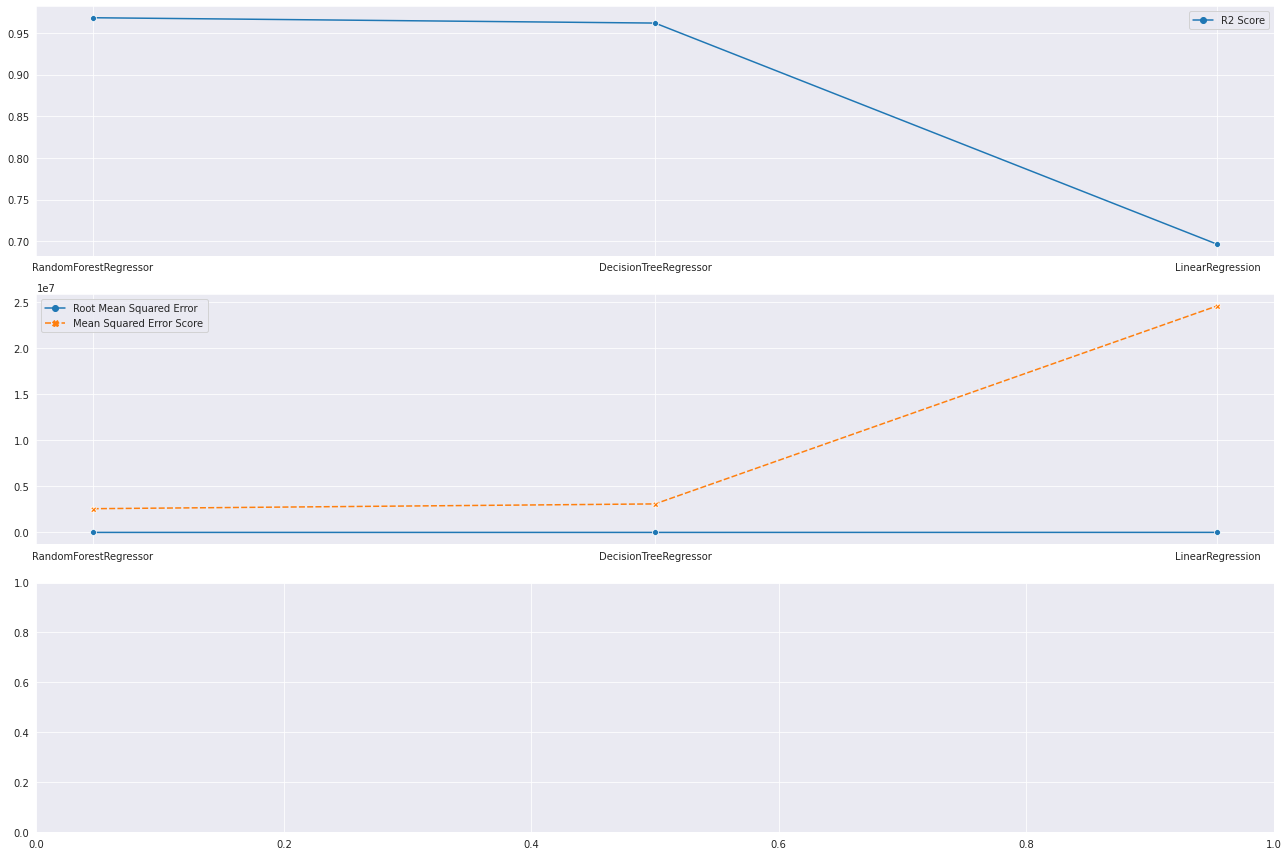

In [112]:
fig,ax=plt.subplots(3,1,figsize=(18,12))
sns.lineplot(data=score_pd.iloc[:,[1,2]],markers=True,ax=ax[1])
sns.lineplot(data=score_pd.iloc[:,[0]],markers=True,ax=ax[0])
plt.tight_layout()
plt.show()

In [113]:
# load test data (assuming it's stored in a pandas DataFrame called "test_data")
X_test = df.drop(columns=[target])
y_test = df[target]

# apply the same preprocessing to the test data as to the training data
X_test = ct.transform(X_test)

# train randomforest model
rf = RandomForestRegressor(n_estimators=100, max_depth=5)
rf.fit(X_train, y_train)
# make predictions on the test data
y_pred = rf.predict(X_test)

# print the predicted output
print(y_pred)


<ipython-input-113-6fc44ac87528>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


[23718.80288972  9764.86316745  3727.5658959  ...  8140.25307836
 26571.29393678 11119.90285393]
